# Perkenalan

### Supervised Regression Machine Learning & Computer Vision Project

**Team Members:**

- Febriana Putri Anggita
- Jyotis Sugata
- Muhammad Dicky Kurniawan
- Sekar Meulu Mahrannisa
- Vittorio Putra

**Initiative**

Trusted-Transports adalah platform transportasi cerdas yang dapat diandalkan untuk memprediksi keterlambatan transum dan memantau kemacetan lalu lintas secara real-time untuk mengoptimalkan perencanaan mobilitas publik. Dengan menggabungkan model prediksi keterlambatan berbasis machine learning dan sistem computer vision yang menganalisis rekaman jalan secara langsung, platform ini membantu penumpang maupun pengelola transportasi dalam mengambil keputusan perjalanan yang cerdas dan berbasis data untuk kebutuhan sehari-hari.

**Background**

Kemacetan dan keterlambatan transportasi umum menyebabkan waktu tempuh tidak pasti, aktivitas terganggu, dan produktivitas menurun. Masalah ini sering dipicu oleh cuaca, jam sibuk, pola hari, serta kegiatan besar yang meningkatkan kepadatan lalu lintas.

Menurut Sidjabat (2015), akar kemacetan di kota besar seperti Jakarta berasal dari pertumbuhan kendaraan pribadi yang jauh melampaui kapasitas jalan dan rendahnya kualitas angkutan umum. Data menunjukkan panjang jalan hanya bertambah sekitar 1% per tahun, sementara jumlah kendaraan meningkat hingga 11%, dengan 98% di antaranya kendaraan pribadi. Kondisi ini memperparah kemacetan dan menurunkan efisiensi sistem transportasi.

Dampaknya tidak hanya pada waktu perjalanan, tetapi juga ekonomi — kerugian akibat kemacetan di Jakarta diperkirakan mencapai Rp8,3 triliun per tahun. Karena itu, dibutuhkan solusi berbasis teknologi seperti prediksi keterlambatan dan pemantauan lalu lintas real-time untuk mendukung mobilitas publik yang lebih efisien dan adaptif terhadap kondisi jalan.

**Problem statement**

Proyek ini hadir untuk menjawab dua kebutuhan utama: (1) memberikan prediksi keterlambatan—apakah sebuah perjalanan berpotensi terlambat dan berapa menit perkiraan keterlambatannya—serta (2) menyediakan wawasan kondisi lalu lintas secara kontekstual (dipengaruhi cuaca, hari, dan event). Dengan memanfaatkan data historis perjalanan, informasi cuaca, kalender acara, serta sinyal operasional, platform ini membantu pengguna merencanakan keberangkatan dengan lebih akurat, sekaligus memberi operator dasar pengambilan keputusan yang lebih baik untuk penjadwalan dan mitigasi kemacetan.

**Objective**

- Tujuan utama proyek Trusted-Transports adalah membangun sistem transportasi cerdas yang mampu:

   - Memprediksi keterlambatan perjalanan secara akurat menggunakan model machine learning    berbasis data historis, kondisi cuaca, pola waktu (jam sibuk, weekday/weekend), dan event publik.

  - Menganalisis kondisi lalu lintas secara real-time melalui computer vision untuk mendeteksi tingkat kemacetan, kepadatan kendaraan, serta anomali di jalan.

  - Menyediakan insight visual interaktif bagi pengguna dan operator transportasi untuk mendukung pengambilan keputusan yang cepat dan berbasis data.

  - Mengoptimalkan perencanaan rute dan jadwal transportasi, sehingga meningkatkan ketepatan waktu perjalanan dan efisiensi operasional armada.

- Dengan demikian, proyek ini bertujuan untuk menciptakan ekosistem mobilitas yang lebih terencana, efisien, dan responsif terhadap dinamika lalu lintas perkotaan.

# Import Librarie

In [1]:
# Data manipulation & analysis
import numpy as np                
import pandas as pd    

# Visualization
import matplotlib.pyplot as plt   
import seaborn as sns    

# Statistics & Outlier Handling
from scipy.stats import spearmanr 
from feature_engine.outliers import Winsorizer  

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV  
from sklearn.feature_selection import f_regression  
from sklearn.compose import ColumnTransformer       
from sklearn.preprocessing import OneHotEncoder, RobustScaler  
from sklearn.impute import SimpleImputer            
from sklearn.pipeline import Pipeline, make_pipeline 


# Models
from sklearn.neighbors import KNeighborsRegressor   
from sklearn.svm import SVR                         
from sklearn.tree import DecisionTreeRegressor     
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 


# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error   

# Model saving
import pickle         



# Data Loading

In [2]:
# pembacaan file csv
df = pd.read_csv("public_transport_delays.csv")
df

,trip_id,date,time,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,...,wind_speed_kmh,precipitation_mm,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,delayed
0,T00000,2023-01-01,05:00:00,Tram,Route_15,Station_31,Station_6,05:02:00,05:55:00,12,...,46,13.0,NaN,500,81,0,1,6,Winter,0
1,T00001,2023-01-01,05:15:00,Metro,Route_12,Station_49,Station_32,05:16:00,05:55:00,15,...,11,11.4,NaN,0,53,0,0,6,Autumn,1
2,T00002,2023-01-01,05:30:00,Bus,Route_16,Station_29,Station_42,05:33:00,06:17:00,0,...,31,14.1,Sports,0,67,1,0,6,Autumn,0
3,T00003,2023-01-01,05:45:00,Tram,Route_19,Station_26,Station_18,05:49:00,06:08:00,15,...,41,6.4,NaN,500,84,0,0,6,Winter,1
4,T00004,2023-01-01,06:00:00,Tram,Route_8,Station_18,Station_15,06:00:00,06:35:00,-1,...,30,18.5,NaN,500,46,0,0,6,Spring,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01995,2023-01-21,23:45:00,Bus,Route_11,Station_46,Station_39,23:46:00,00:11:00,15,...,35,4.6,NaN,0,96,0,0,5,Winter,1
1996,T01996,2023-01-22,00:00:00,Train,Route_9,Station_44,Station_42,00:03:00,00:41:00,11,...,44,15.4,Festival,0,12,0,1,6,Winter,1
1997,T01997,2023-01-22,00:15:00,Bus,Route_12,Station_4,Station_45,00:18:00,00:35:00,1,...,32,2.7,NaN,0,24,1,0,6,Summer,1
1998,T01998,2023-01-22,00:30:00,Tram,Route_17,Station_29,Station_48,00:34:00,01:18:00,7,...,35,8.8,NaN,2000,23,0,0,6,Summer,1


In [3]:
df[df['transport_type'] == 'Bus'].shape[0]


525

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trip_id                     2000 non-null   object 
 1   date                        2000 non-null   object 
 2   time                        2000 non-null   object 
 3   transport_type              2000 non-null   object 
 4   route_id                    2000 non-null   object 
 5   origin_station              2000 non-null   object 
 6   destination_station         2000 non-null   object 
 7   scheduled_departure         2000 non-null   object 
 8   scheduled_arrival           2000 non-null   object 
 9   actual_departure_delay_min  2000 non-null   int64  
 10  actual_arrival_delay_min    2000 non-null   int64  
 11  weather_condition           2000 non-null   object 
 12  temperature_C               2000 non-null   float64
 13  humidity_percent            2000 

---
**Dataset berisi 2000 baris dan 24 kolom, terdiri dari:**

- 12 kolom bertipe object (string / kategori)

- 10 kolom bertipe integer (int64)

- 2 kolom bertipe float (float64)

tidak ada missing values — seluruh kolom memiliki 2000 non-null entries.

---

In [5]:
# gabungkan
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# hapus kolom lama
df.drop(columns=['date', 'time'], inplace=True)

df.head()

,trip_id,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,actual_arrival_delay_min,weather_condition,...,precipitation_mm,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,delayed,datetime
0,T00000,Tram,Route_15,Station_31,Station_6,05:02:00,05:55:00,12,3,Storm,...,13.0,NaN,500,81,0,1,6,Winter,0,2023-01-01 05:00:00
1,T00001,Metro,Route_12,Station_49,Station_32,05:16:00,05:55:00,15,9,Rain,...,11.4,NaN,0,53,0,0,6,Autumn,1,2023-01-01 05:15:00
2,T00002,Bus,Route_16,Station_29,Station_42,05:33:00,06:17:00,0,0,Clear,...,14.1,Sports,0,67,1,0,6,Autumn,0,2023-01-01 05:30:00
3,T00003,Tram,Route_19,Station_26,Station_18,05:49:00,06:08:00,15,10,Clear,...,6.4,NaN,500,84,0,0,6,Winter,1,2023-01-01 05:45:00
4,T00004,Tram,Route_8,Station_18,Station_15,06:00:00,06:35:00,-1,14,Snow,...,18.5,NaN,500,46,0,0,6,Spring,1,2023-01-01 06:00:00


---
Script di atas digunakan buat nyatuin kolom date dan time jadi satu kolom baru yang namanya datetime. Tujuannya biar lebih gampang kalau nanti mau analisis data berdasarkan waktu, misalnya ngelihat pola keterlambatan per jam, hari, atau bulan. Cara kerjanya, dua kolom itu digabung dulu jadi satu string — misal “2024-05-12” dan “14:35:00” jadi “2024-05-12 14:35:00” — terus dikonversi ke format waktu pakai pd.to_datetime(). Setelah kolom baru terbentuk, kolom date dan time yang lama dihapus karena udah nggak dibutuhkan lagi. Terakhir, df.head() dipakai buat ngecek hasilnya, apakah kolom datetime udah muncul dan datanya sesuai. Intinya, langkah ini bikin data lebih rapi dan siap dipakai buat analisis waktu.

---

In [6]:
# Pastikan kolom sudah jadi datetime
df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'])
df['scheduled_arrival'] = pd.to_datetime(df['scheduled_arrival'])

# Buat kolom baru untuk selisih waktu (dalam menit)
df['scheduled_duration_min'] = (df['scheduled_arrival'] - df['scheduled_departure']).dt.total_seconds() / 60

# Ganti nilai negatif jadi NaN
df.loc[df['scheduled_duration_min'] <= 0, 'scheduled_duration_min'] = np.nan

# Hapus kolom lama 
df.drop(columns=['scheduled_arrival', 'scheduled_departure'], inplace=True)

# Tampilkan hasil awal
df.head()

C:\Users\dadri\AppData\Local\Temp\ipykernel_11412\743119901.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'])
C:\Users\dadri\AppData\Local\Temp\ipykernel_11412\743119901.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['scheduled_arrival'] = pd.to_datetime(df['scheduled_arrival'])


,trip_id,transport_type,route_id,origin_station,destination_station,actual_departure_delay_min,actual_arrival_delay_min,weather_condition,temperature_C,humidity_percent,...,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,delayed,datetime,scheduled_duration_min
0,T00000,Tram,Route_15,Station_31,Station_6,12,3,Storm,5.1,52,...,NaN,500,81,0,1,6,Winter,0,2023-01-01 05:00:00,53.0
1,T00001,Metro,Route_12,Station_49,Station_32,15,9,Rain,34.0,64,...,NaN,0,53,0,0,6,Autumn,1,2023-01-01 05:15:00,39.0
2,T00002,Bus,Route_16,Station_29,Station_42,0,0,Clear,29.5,35,...,Sports,0,67,1,0,6,Autumn,0,2023-01-01 05:30:00,44.0
3,T00003,Tram,Route_19,Station_26,Station_18,15,10,Clear,27.4,55,...,NaN,500,84,0,0,6,Winter,1,2023-01-01 05:45:00,19.0
4,T00004,Tram,Route_8,Station_18,Station_15,-1,14,Snow,0.1,90,...,NaN,500,46,0,0,6,Spring,1,2023-01-01 06:00:00,35.0


In [7]:
# Jumlah missing values per kolom
df.isna().sum()

trip_id                          0
transport_type                   0
route_id                         0
origin_station                   0
destination_station              0
actual_departure_delay_min       0
actual_arrival_delay_min         0
weather_condition                0
temperature_C                    0
humidity_percent                 0
wind_speed_kmh                   0
precipitation_mm                 0
event_type                    1173
event_attendance_est             0
traffic_congestion_index         0
holiday                          0
peak_hour                        0
weekday                          0
season                           0
delayed                          0
datetime                         0
scheduled_duration_min          45
dtype: int64

---
Hasil pengecekan missing values menunjukkan bahwa hampir semua kolom dalam dataset sudah lengkap tanpa ada data kosong, kecuali kolom scheduled_duration_min yang memiliki 45 nilai hilang. Artinya, dari total 2000 baris data, hanya sebagian kecil (sekitar 2,25%) yang belum memiliki durasi jadwal perjalanan.

---

In [8]:
# Cek presentase missing value
df.isna().mean()*100

trip_id                        0.00
transport_type                 0.00
route_id                       0.00
origin_station                 0.00
destination_station            0.00
actual_departure_delay_min     0.00
actual_arrival_delay_min       0.00
weather_condition              0.00
temperature_C                  0.00
humidity_percent               0.00
wind_speed_kmh                 0.00
precipitation_mm               0.00
event_type                    58.65
event_attendance_est           0.00
traffic_congestion_index       0.00
holiday                        0.00
peak_hour                      0.00
weekday                        0.00
season                         0.00
delayed                        0.00
datetime                       0.00
scheduled_duration_min         2.25
dtype: float64

In [9]:
df = df.dropna(subset=['scheduled_duration_min']).copy()


In [10]:
# Jumlah missing values per kolom
df.isna().sum()

trip_id                          0
transport_type                   0
route_id                         0
origin_station                   0
destination_station              0
actual_departure_delay_min       0
actual_arrival_delay_min         0
weather_condition                0
temperature_C                    0
humidity_percent                 0
wind_speed_kmh                   0
precipitation_mm                 0
event_type                    1147
event_attendance_est             0
traffic_congestion_index         0
holiday                          0
peak_hour                        0
weekday                          0
season                           0
delayed                          0
datetime                         0
scheduled_duration_min           0
dtype: int64

In [11]:
# Bulatkan hasilnya dan ubah ke int64
df['scheduled_duration_min'] = df['scheduled_duration_min'].round(0).astype('int64')


In [12]:
# Pengecekan data Duplikat
df.duplicated().sum()

0

In [13]:
# Melakuakn describe pada data
df.describe()

,actual_departure_delay_min,actual_arrival_delay_min,temperature_C,humidity_percent,wind_speed_kmh,precipitation_mm,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,delayed,datetime,scheduled_duration_min
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955,1955.000000
mean,8.683887,13.369309,15.097391,64.721228,29.260870,9.861125,6470.843990,50.239898,0.088491,0.273146,2.974425,0.748849,2023-01-11 14:31:38.516624128,36.927877
min,-2.000000,-3.000000,-5.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-01-01 05:00:00,16.000000
25%,3.000000,5.000000,5.100000,46.000000,15.000000,4.900000,0.000000,25.000000,0.000000,0.000000,1.000000,0.000000,2023-01-06 09:22:30,27.000000
50%,9.000000,14.000000,15.200000,65.000000,29.000000,9.800000,0.000000,50.000000,0.000000,0.000000,3.000000,1.000000,2023-01-11 14:15:00,37.000000
75%,14.000000,21.000000,24.800000,83.000000,44.000000,14.800000,2000.000000,76.000000,0.000000,1.000000,5.000000,1.000000,2023-01-16 19:37:30,46.500000
max,19.000000,29.000000,35.000000,99.000000,59.000000,20.000000,50000.000000,99.000000,1.000000,1.000000,6.000000,1.000000,2023-01-22 00:45:00,59.000000
std,6.266131,9.308083,11.496158,20.362366,17.227613,5.778821,15251.371033,29.159292,0.284080,0.445689,1.990088,0.433786,NaN,11.337496


---
Berdasarkan hasil statistik deskriptif di atas, rata-rata keterlambatan keberangkatan (`actual_departure_delay_min`) mencapai **8,68 menit**, sedangkan keterlambatan kedatangan (`actual_arrival_delay_min`) sedikit lebih tinggi yaitu **13,36 menit**. Nilai maksimum keterlambatan mencapai **19 menit** untuk keberangkatan dan **29 menit** untuk kedatangan, menunjukkan adanya beberapa perjalanan dengan gangguan waktu cukup signifikan. Suhu rata-rata selama periode pengamatan adalah **15°C** dengan kelembapan sekitar **65%**, serta kecepatan angin rata-rata **29 km/jam** dan curah hujan **9,86 mm**, menandakan kondisi cuaca yang relatif stabil dan tidak ekstrem.

Indeks kemacetan lalu lintas (`traffic_congestion_index`) memiliki nilai rata-rata **50,2**, menunjukkan tingkat kepadatan jalan pada level sedang, namun bisa mencapai **99** pada kondisi paling padat. Hanya sekitar **8,8%** perjalanan terjadi pada hari libur dan **27%** pada jam sibuk, sedangkan sekitar **74,9%** perjalanan tercatat mengalami keterlambatan, menandakan bahwa ketidaktepatan waktu merupakan masalah yang cukup umum. Rata-rata durasi perjalanan terjadwal (`scheduled_duration_min`) adalah **36,9 menit**, dengan variasi antara **16 hingga 59 menit**, mengindikasikan adanya perbedaan waktu tempuh antar rute yang signifikan.



---

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   trip_id                     1955 non-null   object        
 1   transport_type              1955 non-null   object        
 2   route_id                    1955 non-null   object        
 3   origin_station              1955 non-null   object        
 4   destination_station         1955 non-null   object        
 5   actual_departure_delay_min  1955 non-null   int64         
 6   actual_arrival_delay_min    1955 non-null   int64         
 7   weather_condition           1955 non-null   object        
 8   temperature_C               1955 non-null   float64       
 9   humidity_percent            1955 non-null   int64         
 10  wind_speed_kmh              1955 non-null   int64         
 11  precipitation_mm            1955 non-null   float64       
 1

In [15]:
# Backup Data
backup_data = df.copy()

# Feature Engineering

## Handling Cardinality

In [16]:
# Membuat list kosong dan melakukan looping
list_columns = []
for col in df:
    n_unique = df[col].nunique()
    unique_vals = df[col].unique()
    list_columns.append({
        'Nama kolom': col,
        'jumlah nilai unique': n_unique,
        'nilai unique': unique_vals
    })
cardinality = pd.DataFrame(list_columns)
pd.set_option('display.max_colwidth', None)

# Mengurutkan nilai unik dari yg terbanyak
cardinality = cardinality.sort_values(by='jumlah nilai unique', ascending=False).reset_index(drop=True)

# Menampilkan hasil cardinality
display(cardinality)


,Nama kolom,jumlah nilai unique,nilai unique
0,trip_id,1955,"[T00000, T00001, T00002, T00003, T00004, T00005, T00006, T00007, T00008, T00009, T00010, T00011, T00012, T00013, T00014, T00015, T00016, T00017, T00018, T00019, T00020, T00021, T00022, T00023, T00024, T00025, T00026, T00027, T00028, T00029, T00030, T00031, T00032, T00033, T00034, T00035, T00036, T00037, T00038, T00039, T00040, T00041, T00042, T00043, T00044, T00045, T00046, T00047, T00048, T00049, T00050, T00051, T00052, T00053, T00054, T00055, T00056, T00057, T00058, T00059, T00060, T00061, T00062, T00063, T00064, T00065, T00066, T00067, T00068, T00069, T00070, T00071, T00072, T00073, T00074, T00076, T00077, T00078, T00079, T00080, T00081, T00082, T00083, T00084, T00085, T00086, T00087, T00088, T00089, T00090, T00091, T00092, T00093, T00094, T00095, T00096, T00097, T00098, T00099, T00100, ...]"
1,datetime,1955,"[2023-01-01 05:00:00, 2023-01-01 05:15:00, 2023-01-01 05:30:00, 2023-01-01 05:45:00, 2023-01-01 06:00:00, 2023-01-01 06:15:00, 2023-01-01 06:30:00, 2023-01-01 06:45:00, 2023-01-01 07:00:00, 2023-01-01 07:15:00, 2023-01-01 07:30:00, 2023-01-01 07:45:00, 2023-01-01 08:00:00, 2023-01-01 08:15:00, 2023-01-01 08:30:00, 2023-01-01 08:45:00, 2023-01-01 09:00:00, 2023-01-01 09:15:00, 2023-01-01 09:30:00, 2023-01-01 09:45:00, 2023-01-01 10:00:00, 2023-01-01 10:15:00, 2023-01-01 10:30:00, 2023-01-01 10:45:00, 2023-01-01 11:00:00, 2023-01-01 11:15:00, 2023-01-01 11:30:00, 2023-01-01 11:45:00, 2023-01-01 12:00:00, 2023-01-01 12:15:00, 2023-01-01 12:30:00, 2023-01-01 12:45:00, 2023-01-01 13:00:00, 2023-01-01 13:15:00, 2023-01-01 13:30:00, 2023-01-01 13:45:00, 2023-01-01 14:00:00, 2023-01-01 14:15:00, 2023-01-01 14:30:00, 2023-01-01 14:45:00, 2023-01-01 15:00:00, 2023-01-01 15:15:00, 2023-01-01 15:30:00, 2023-01-01 15:45:00, 2023-01-01 16:00:00, 2023-01-01 16:15:00, 2023-01-01 16:30:00, 2023-01-01 16:45:00, 2023-01-01 17:00:00, 2023-01-01 17:15:00, 2023-01-01 17:30:00, 2023-01-01 17:45:00, 2023-01-01 18:00:00, 2023-01-01 18:15:00, 2023-01-01 18:30:00, 2023-01-01 18:45:00, 2023-01-01 19:00:00, 2023-01-01 19:15:00, 2023-01-01 19:30:00, 2023-01-01 19:45:00, 2023-01-01 20:00:00, 2023-01-01 20:15:00, 2023-01-01 20:30:00, 2023-01-01 20:45:00, 2023-01-01 21:00:00, 2023-01-01 21:15:00, 2023-01-01 21:30:00, 2023-01-01 21:45:00, 2023-01-01 22:00:00, 2023-01-01 22:15:00, 2023-01-01 22:30:00, 2023-01-01 22:45:00, 2023-01-01 23:00:00, 2023-01-01 23:15:00, 2023-01-01 23:30:00, 2023-01-02 00:00:00, 2023-01-02 00:15:00, 2023-01-02 00:30:00, 2023-01-02 00:45:00, 2023-01-02 01:00:00, 2023-01-02 01:15:00, 2023-01-02 01:30:00, 2023-01-02 01:45:00, 2023-01-02 02:00:00, 2023-01-02 02:15:00, 2023-01-02 02:30:00, 2023-01-02 02:45:00, 2023-01-02 03:00:00, 2023-01-02 03:15:00, 2023-01-02 03:30:00, 2023-01-02 03:45:00, 2023-01-02 04:00:00, 2023-01-02 04:15:00, 2023-01-02 04:30:00, 2023-01-02 04:45:00, 2023-01-02 05:00:00, 2023-01-02 05:15:00, 2023-01-02 05:30:00, 2023-01-02 05:45:00, 2023-01-02 06:00:00, ...]"
2,temperature_C,397,"[5.1, 34.0, 29.5, 27.4, 0.1, 25.2, 3.6, 34.1, -2.9, 9.1, 12.1, 28.0, 25.6, 10.0, 17.6, 28.4, -4.3, 27.1, 32.9, -3.7, -3.2, 8.8, -1.5, 14.2, 24.1, 17.7, 2.9, 21.2, 22.4, 32.3, 0.9, 22.7, 31.5, 15.1, 9.5, 1.8, 29.7, 10.8, 32.0, 28.9, 10.1, 18.0, -3.9, 5.5, 23.4, 22.1, 27.3, 4.4, 13.5, 13.9, 8.6, 33.2, 22.9, 16.6, 15.4, 1.4, 9.9, 21.9, 27.7, 7.0, 12.4, -1.7, -0.9, 13.8, 16.2, 5.6, 20.7, 23.1, 25.3, 3.2, 16.8, 27.2, 31.3, -2.7, 18.5, 17.5, 21.4, 28.3, 24.0, 26.6, 6.6, 10.5, 20.1, 17.1, 33.4, 2.5, 17.9, 32.2, 8.4, -2.3, 11.9, 34.5, 12.2, 7.2, 9.6, 10.9, 27.9, -1.8, 7.7, 33.7, ...]"
3,precipitation_mm,201,"[13.0, 11.4, 14.1, 6.4, 18.5, 2.3, 0.6, 5.4, 4.4, 1.0, 9.8, 9.4, 1.6, 5.2, 19.1, 2.2, 6.1, 0.7, 3.0, 14.0, 7.3, 9.0, 3.1, 13.6, 15.0, 3.6, 0.9, 13.1, 2.7, 9.9, 3.4, 0.1, 1.8, 7.9, 12.0, 7.4, 14.8, 13.9, 18.7, 4.7, 3.8, 12.2, 11.9, 10.2, 11.1, 6.7, 19.4, 7.1, 2.8, 8.0, 12.6, 10.1, 10.7, 0.5, 5.1, 6.2, 19.7, 5.9, 17.9, 1.9, 5.0, 5.5, 19.6, 13.5, 18.6, 16.7, 12.5, 13.3, 5.3, 8.2,

---
Berdasarkan hasil analisis nilai **unique** pada setiap kolom, dataset ini memiliki variasi data yang cukup beragam. Kolom seperti `trip_id` dan `datetime` memiliki **1955 nilai unik**, menunjukkan bahwa setiap perjalanan tercatat secara individual tanpa duplikasi. Variabel cuaca seperti `temperature_C`, `precipitation_mm`, `humidity_percent`, dan `wind_speed_kmh` memiliki variasi nilai yang tinggi (antara 44 hingga 397 nilai unik), menandakan kondisi cuaca yang dinamis selama periode observasi. Selain itu, kolom seperti `traffic_congestion_index` dengan 100 nilai unik menggambarkan tingkat kemacetan yang bervariasi dari satu perjalanan ke perjalanan lainnya.

Sementara itu, beberapa kolom bersifat kategorikal dengan jumlah kategori terbatas, seperti `transport_type` yang terdiri dari 4 jenis transportasi (Tram, Metro, Bus, dan Train), `season` dengan 4 musim, serta `weather_condition` dan `event_type` yang masing-masing memiliki 6 kategori. Kolom `weekday`, `holiday`, `peak_hour`, dan `delayed` menunjukkan data yang bersifat biner atau ordinal dengan variasi kecil, mencerminkan faktor waktu dan status tertentu dalam sistem transportasi. Secara keseluruhan, komposisi dataset ini mencerminkan keseimbangan antara data numerik yang menggambarkan kondisi dinamis perjalanan dan data kategorikal yang merepresentasikan konteks operasional, seperti jenis transportasi, rute, serta pengaruh cuaca dan acara terhadap keterlambatan perjalanan.



---

In [17]:
# Kolom kategori (diskrit/biner)
cat_cols = ['holiday', 'peak_hour', 'weekday']
df[cat_cols] = df[cat_cols].astype('category')

# Kolom numerik (kontinu)
num_cols = [
    'actual_departure_delay_min', 'temperature_C', 'humidity_percent',
    'wind_speed_kmh', 'precipitation_mm', 'event_attendance_est',
    'traffic_congestion_index', 'scheduled_duration_min'
]

# Drop kolom ID karena tidak memiliki makna prediktif
drop_cols = ['trip_id', 'delayed', 'route_id', 'event_type' ]
df.drop(columns=drop_cols, inplace=True)

# Cek ulang hasil
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   transport_type              1955 non-null   object        
 1   origin_station              1955 non-null   object        
 2   destination_station         1955 non-null   object        
 3   actual_departure_delay_min  1955 non-null   int64         
 4   actual_arrival_delay_min    1955 non-null   int64         
 5   weather_condition           1955 non-null   object        
 6   temperature_C               1955 non-null   float64       
 7   humidity_percent            1955 non-null   int64         
 8   wind_speed_kmh              1955 non-null   int64         
 9   precipitation_mm            1955 non-null   float64       
 10  event_attendance_est        1955 non-null   int64         
 11  traffic_congestion_index    1955 non-null   int64         
 1

,transport_type,origin_station,destination_station,actual_departure_delay_min,actual_arrival_delay_min,weather_condition,temperature_C,humidity_percent,wind_speed_kmh,precipitation_mm,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,datetime,scheduled_duration_min
0,Tram,Station_31,Station_6,12,3,Storm,5.1,52,46,13.0,500,81,0,1,6,Winter,2023-01-01 05:00:00,53
1,Metro,Station_49,Station_32,15,9,Rain,34.0,64,11,11.4,0,53,0,0,6,Autumn,2023-01-01 05:15:00,39
2,Bus,Station_29,Station_42,0,0,Clear,29.5,35,31,14.1,0,67,1,0,6,Autumn,2023-01-01 05:30:00,44
3,Tram,Station_26,Station_18,15,10,Clear,27.4,55,41,6.4,500,84,0,0,6,Winter,2023-01-01 05:45:00,19
4,Tram,Station_18,Station_15,-1,14,Snow,0.1,90,30,18.5,500,46,0,0,6,Spring,2023-01-01 06:00:00,35


### Split Between X (Features) and Y (target)

In [18]:
# Drop kolom target dengan nama yang persis
x = df.drop(columns=["actual_arrival_delay_min"])
y = df["actual_arrival_delay_min"]

# Cek lagi kolom yang tersisa di X
x.head()

,transport_type,origin_station,destination_station,actual_departure_delay_min,weather_condition,temperature_C,humidity_percent,wind_speed_kmh,precipitation_mm,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,datetime,scheduled_duration_min
0,Tram,Station_31,Station_6,12,Storm,5.1,52,46,13.0,500,81,0,1,6,Winter,2023-01-01 05:00:00,53
1,Metro,Station_49,Station_32,15,Rain,34.0,64,11,11.4,0,53,0,0,6,Autumn,2023-01-01 05:15:00,39
2,Bus,Station_29,Station_42,0,Clear,29.5,35,31,14.1,0,67,1,0,6,Autumn,2023-01-01 05:30:00,44
3,Tram,Station_26,Station_18,15,Clear,27.4,55,41,6.4,500,84,0,0,6,Winter,2023-01-01 05:45:00,19
4,Tram,Station_18,Station_15,-1,Snow,0.1,90,30,18.5,500,46,0,0,6,Spring,2023-01-01 06:00:00,35


In [19]:
# Melihat rata-rata semua kolom antar kolom target
target = 'actual_arrival_delay_min'

# Ambil semua fitur (kecuali target)
X_cols = [
    'transport_type', 'origin_station', 'destination_station',
    'weather_condition','temperature_C', 'humidity_percent', 'wind_speed_kmh', 'precipitation_mm',
    'event_attendance_est', 'traffic_congestion_index',
    'holiday', 'peak_hour', 'weekday', 'season', 'datetime',
    'scheduled_duration_min'
]

for col in X_cols:
    print(f"\nRata-rata {target} berdasarkan {col}:")
    print(df.groupby(col)[target].mean().sort_values(ascending=False).head(10))



Rata-rata actual_arrival_delay_min berdasarkan transport_type:
transport_type
Train    13.641667
Bus      13.544747
Metro    13.305613
Tram     12.972917
Name: actual_arrival_delay_min, dtype: float64

Rata-rata actual_arrival_delay_min berdasarkan origin_station:
origin_station
Station_48    16.545455
Station_14    16.481481
Station_22    15.822222
Station_26    15.390244
Station_16    15.361111
Station_17    15.018182
Station_33    14.866667
Station_40    14.836735
Station_4     14.829268
Station_35    14.769231
Name: actual_arrival_delay_min, dtype: float64

Rata-rata actual_arrival_delay_min berdasarkan destination_station:
destination_station
Station_13    16.441860
Station_31    16.233333
Station_25    15.666667
Station_7     15.577778
Station_49    15.406250
Station_35    15.166667
Station_27    15.125000
Station_15    15.000000
Station_20    14.945946
Station_16    14.921569
Name: actual_arrival_delay_min, dtype: float64

Rata-rata actual_arrival_delay_min berdasarkan weather_

C:\Users\dadri\AppData\Local\Temp\ipykernel_11412\817709333.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)[target].mean().sort_values(ascending=False).head(10))


---
Berdasarkan hasil perhitungan rata-rata **`actual_arrival_delay_min`**, dapat disimpulkan bahwa tingkat keterlambatan kedatangan bervariasi tergantung pada jenis transportasi dan stasiun asal maupun tujuan. Dari sisi **jenis transportasi**, rata-rata keterlambatan tertinggi terjadi pada **kereta (Train)** sebesar **13,64 menit**, diikuti oleh **bus (13,54 menit)**, **metro (13,30 menit)**, dan **tram (12,97 menit)**. Hal ini menunjukkan bahwa moda transportasi berbasis rel seperti kereta cenderung mengalami keterlambatan sedikit lebih tinggi dibandingkan moda lainnya, kemungkinan karena faktor jadwal tetap, panjang lintasan, atau kepadatan rute yang lebih tinggi.

Sementara itu, dari sisi **stasiun asal dan tujuan**, terlihat bahwa beberapa stasiun tertentu memiliki keterlambatan rata-rata yang jauh di atas rata-rata keseluruhan. Misalnya, **Station_48** dan **Station_14** mencatat rata-rata keterlambatan di atas **16 menit**, menunjukkan potensi adanya titik-titik kemacetan atau bottleneck pada area tersebut. Stasiun dengan rata-rata keterlambatan lebih tinggi kemungkinan berada di jalur padat, memiliki volume penumpang besar, atau terpengaruh kondisi lalu lintas dan cuaca lokal. Dengan demikian, dapat disimpulkan bahwa faktor jenis transportasi dan lokasi stasiun berperan penting dalam memengaruhi ketepatan waktu kedatangan transportasi publik.

---


### Splitting between Train Set and Test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=7,)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1564, 17)
Test Size (391, 17)


---
Pada tahap ini dilakukan proses **pembagian dataset menjadi data latih (train) dan data uji (test)** menggunakan fungsi `train_test_split`. Dari hasil pembagian terlihat bahwa **80% data (1.564 baris)** digunakan untuk pelatihan model, sedangkan **20% data (391 baris)** disisihkan untuk pengujian. Tujuan dari langkah ini adalah agar model dapat belajar mengenali pola dari data latih, lalu diuji performanya pada data yang belum pernah dilihat sebelumnya. Pembagian ini juga disertai dengan pengaturan parameter `random_state=7` agar hasil pemisahan tetap konsisten setiap kali dijalankan. Dengan pembagian yang proporsional seperti ini, analisis dan evaluasi model selanjutnya dapat dilakukan dengan lebih akurat dan objektif.

---

## Healding Outlier

In [21]:
# ambil kolom numerik dari X_train
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# simpan hasil
rows = []
for col in num_cols:
    skew_val = round(X_train[col].skew(), 2)
    distrib = 'normal' if -0.5 <= skew_val <= 0.5 else 'skewed'
    rows.append([col, skew_val, distrib])

# ubah ke DataFrame
skewness_df = pd.DataFrame(rows, columns=['nama kolom', 'nilai skewness', 'distribution'])
skewness_df = skewness_df.sort_values(by='nilai skewness', ascending=False).reset_index(drop=True)

display(skewness_df)


,nama kolom,nilai skewness,distribution
0,event_attendance_est,2.42,skewed
1,scheduled_duration_min,0.05,normal
2,wind_speed_kmh,0.03,normal
3,precipitation_mm,0.03,normal
4,temperature_C,0.01,normal
5,humidity_percent,-0.03,normal
6,traffic_congestion_index,-0.03,normal
7,actual_departure_delay_min,-0.06,normal


---
Berdasarkan hasil perhitungan nilai skewness pada data numerik di X_train, terlihat bahwa sebagian besar variabel memiliki distribusi yang normal, karena nilai skewness-nya berada dalam rentang -0.5 hingga 0.5. Kolom seperti scheduled_duration_min, wind_speed_kmh, precipitation_mm, temperature_C, humidity_percent, traffic_congestion_index, dan actual_departure_delay_min menunjukkan distribusi yang seimbang antara sisi kiri dan kanan kurva, sehingga tidak memerlukan transformasi lebih lanjut.

Namun, kolom event_attendance_est memiliki nilai skewness sebesar 2.42, yang menandakan distribusinya condong ke kanan (positively skewed). Hal ini menunjukkan bahwa sebagian besar nilai dalam kolom tersebut berada di rentang bawah, sementara ada beberapa nilai ekstrem yang sangat besar (outlier) yang menarik distribusi ke arah kanan.

---

In [22]:
# List kosong untuk hasil
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

# Loop berdasarkan hasil skewness
for row in range(len(skewness_df)):
    col = skewness_df.loc[row, 'nama kolom']

    # Cek upper dan lower boundary berdasarkan distribusi
    if skewness_df.loc[row, 'distribution'] == 'skewed':
        IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
        lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
        upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
    else:
        lower_boundary = X_train[col].mean() - 3 * X_train[col].std()
        upper_boundary = X_train[col].mean() + 3 * X_train[col].std()
    
    # Hitung persentase total outlier
    total_outlier = (
        ((X_train[col] > upper_boundary).sum() + (X_train[col] < lower_boundary).sum()) / len(X_train) * 100
    )
    
    # Masukkan hasil ke list
    column.append(col)
    lower_bound.append(round(lower_boundary, 2))
    upper_bound.append(round(upper_boundary, 2))
    percent_total_outlier.append(round(total_outlier, 2))

# Buat DataFrame hasil akhir
outliers = pd.DataFrame({
    'nama kolom': column,
    'lower boundary': lower_bound,
    'upper boundary': upper_bound,
    'persentase total outlier (%)': percent_total_outlier
})

# Tampilkan hasil urut dari outlier tertinggi
display(outliers.sort_values(by='persentase total outlier (%)', ascending=False))


,nama kolom,lower boundary,upper boundary,persentase total outlier (%)
0,event_attendance_est,-6000.00,8000.00,19.82
1,scheduled_duration_min,2.83,70.71,0.00
2,wind_speed_kmh,-22.26,80.63,0.00
3,precipitation_mm,-7.41,27.33,0.00
4,temperature_C,-19.47,49.50,0.00
5,humidity_percent,3.33,125.96,0.00
6,traffic_congestion_index,-37.77,137.07,0.00
7,actual_departure_delay_min,-9.80,27.56,0.00


---
Hasil analisis outlier menunjukkan bahwa sebagian besar variabel numerik berada dalam rentang batas wajar, dengan persentase total outlier sebesar 0%, kecuali pada kolom event_attendance_est yang memiliki outlier cukup tinggi sebesar 19,82%. Nilai batas bawah dan atas untuk kolom ini berada pada -6000 dan 8000, menunjukkan adanya beberapa data ekstrem yang jauh di luar pola mayoritas. Kondisi ini mengonfirmasi hasil sebelumnya bahwa distribusi kolom tersebut bersifat positively skewed, atau condong ke kanan. Sementara itu, variabel lain seperti scheduled_duration_min, wind_speed_kmh, precipitation_mm, temperature_C, humidity_percent, traffic_congestion_index, dan actual_departure_delay_min tidak menunjukkan adanya outlier yang signifikan, menandakan data sudah relatif bersih dan stabil. Dengan demikian, langkah perbaikan dapat difokuskan pada penanganan outlier di kolom event_attendance_est, misalnya dengan winsorizing atau transformasi logaritmik, agar tidak memengaruhi keseimbangan model dan hasil analisis statistik selanjutnya.

---

In [23]:
# Pilih kolom numerik kontinu yang punya outlier tinggi
winsor_cols = ["event_attendance_est"]

# Terapkan Winsorizer
winsor = Winsorizer(
    capping_method="iqr",   # metode IQR
    tail="both",            # batas bawah & atas
    fold=1.5,               # rentang (1.5 x IQR)
    variables=winsor_cols,
    missing_values="ignore"
)

# Transformasi data
X_train_capped = winsor.fit_transform(X_train)
X_test_capped  = winsor.transform(X_test)


---
Proses pada kode ini bertujuan untuk menangani outlier pada kolom numerik yang terdeteksi memiliki nilai ekstrem tinggi, yaitu event_attendance_est. Metode yang digunakan adalah Winsorization, yaitu teknik yang menyesuaikan nilai outlier agar tetap berada dalam batas wajar tanpa harus menghapus data.

---

In [24]:
# Buat fungsi untuk menampilkan plot sebelum dan sesudah di capping (Winsorizer)
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

event_attendance_est - Before Capping


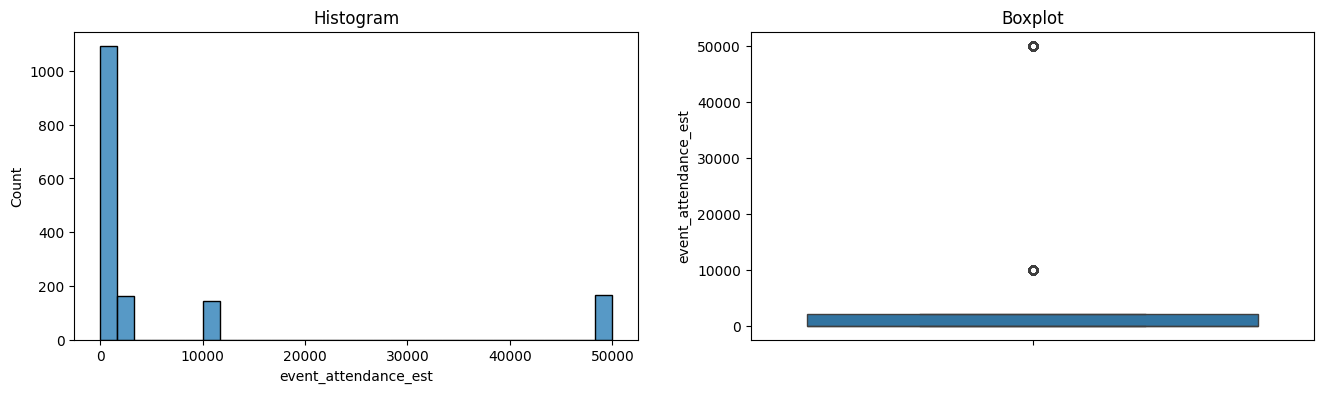

event_attendance_est - After Capping


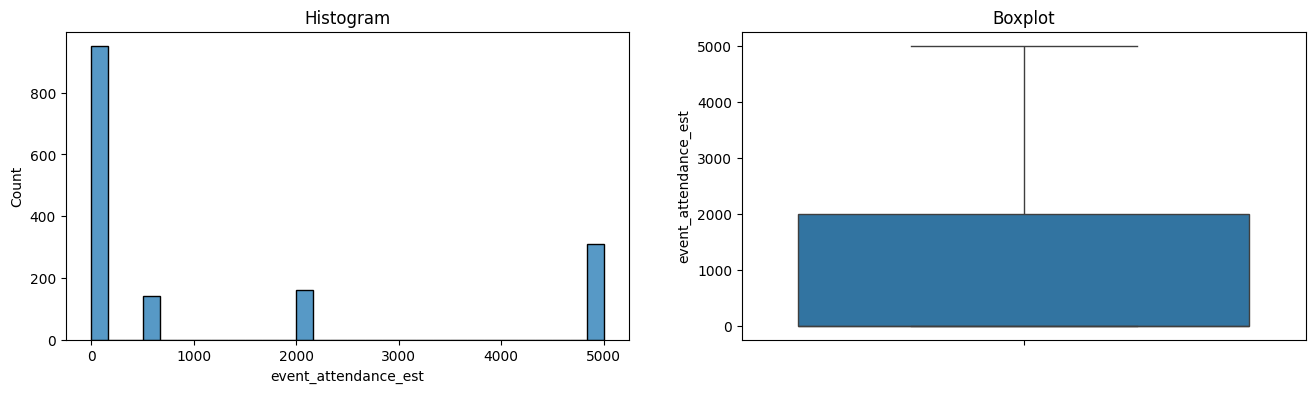

In [25]:
# Cek distribusi sebelum dan sesudah capping (Winsorizer)
print('event_attendance_est - Before Capping')
diagnostic_plots(X_train, 'event_attendance_est')

print('event_attendance_est - After Capping')
diagnostic_plots(X_train_capped, 'event_attendance_est')


**Sebelum Capping**

* Histogram menunjukkan distribusi yang sangat miring ke kanan (right-skewed), dengan sebagian besar nilai terkonsentrasi di sekitar 0 hingga 1.000, sementara ada beberapa nilai ekstrem hingga 50.000.

* Pada boxplot terlihat jelas adanya beberapa outlier ekstrem yang jauh di atas whisker, menandakan nilai-nilai yang tidak wajar atau terlalu jauh dari mayoritas data.

* Kondisi ini dapat menyebabkan model menjadi bias, karena nilai-nilai ekstrem tersebut akan memengaruhi rata-rata dan skala data.

**Sesudah Capping**

* Setelah dilakukan capping (pemotongan nilai ekstrem hingga batas tertentu, misalnya pada persentil 95 atau 99), distribusi data menjadi lebih seimbang dan terkendali.

* Outlier ekstrem pada boxplot sudah tidak muncul lagi; whisker terlihat memotong nilai maksimum di sekitar 5.000, sehingga data menjadi lebih kompak.

* Distribusi pada histogram kini lebih representatif terhadap mayoritas observasi — tidak lagi “ditarik” oleh nilai ekstrem.

**Kesimpulan**

Proses capping berhasil mengurangi pengaruh outlier pada kolom event_attendance_est, membuat data lebih stabil untuk analisis statistik maupun pemodelan machine learning. Nilai maksimum yang sebelumnya mencapai 50.000 kini dibatasi hingga sekitar 5.000, sehingga variabel ini tidak lagi mendistorsi hasil model. Secara keseluruhan, langkah ini meningkatkan kualitas dan keseimbangan distribusi data, tanpa menghilangkan pola utama dari jumlah peserta acara yang sebenarnya.

## Headling Missing Value

In [26]:
# Melakukan pengecekan Missing value pada dataset
X_train_capped.isnull().sum()

transport_type                0
origin_station                0
destination_station           0
actual_departure_delay_min    0
weather_condition             0
temperature_C                 0
humidity_percent              0
wind_speed_kmh                0
precipitation_mm              0
event_attendance_est          0
traffic_congestion_index      0
holiday                       0
peak_hour                     0
weekday                       0
season                        0
datetime                      0
scheduled_duration_min        0
dtype: int64

In [27]:
X_test_capped.isnull().sum()

transport_type                0
origin_station                0
destination_station           0
actual_departure_delay_min    0
weather_condition             0
temperature_C                 0
humidity_percent              0
wind_speed_kmh                0
precipitation_mm              0
event_attendance_est          0
traffic_congestion_index      0
holiday                       0
peak_hour                     0
weekday                       0
season                        0
datetime                      0
scheduled_duration_min        0
dtype: int64

In [28]:
X_train_capped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1564 entries, 100 to 178
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   transport_type              1564 non-null   object        
 1   origin_station              1564 non-null   object        
 2   destination_station         1564 non-null   object        
 3   actual_departure_delay_min  1564 non-null   int64         
 4   weather_condition           1564 non-null   object        
 5   temperature_C               1564 non-null   float64       
 6   humidity_percent            1564 non-null   int64         
 7   wind_speed_kmh              1564 non-null   int64         
 8   precipitation_mm            1564 non-null   float64       
 9   event_attendance_est        1564 non-null   int64         
 10  traffic_congestion_index    1564 non-null   int64         
 11  holiday                     1564 non-null   category      
 

### Split Between Numeric Columns and Categorical Columns


In [29]:
# Ambil kolom numerik (int64 & float64)
num_columns = X_train_capped.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ambil kolom kategorikal (object atau category)
cat_columns = X_train_capped.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", num_columns)
print("\nCategorical Columns:", cat_columns)


Numeric Columns: ['actual_departure_delay_min', 'temperature_C', 'humidity_percent', 'wind_speed_kmh', 'precipitation_mm', 'event_attendance_est', 'traffic_congestion_index', 'scheduled_duration_min']

Categorical Columns: ['transport_type', 'origin_station', 'destination_station', 'weather_condition', 'holiday', 'peak_hour', 'weekday', 'season']


---
- Kolom numerik mencakup variabel-variabel dengan nilai kontinu seperti actual_departure_delay_min, temperature_C, humidity_percent, wind_speed_kmh, precipitation_mm, event_attendance_est, traffic_congestion_index, dan scheduled_duration_min.

- kolom kategorikal terdiri dari transport_type, origin_station, destination_station, weather_condition,  holiday, peak_hour, weekday, season

---

## Feature Selection

In [30]:
# Feature selection Numerikal
p_values, interpretasi, cols = [], [], []

for col in num_columns:   
    corr, pval = spearmanr(X_train_capped[col], y_train)
    p_values.append(pval)
    cols.append(col)
    interpretasi.append("Ada Korelasi" if pval < 0.05 else "Tidak Ada Korelasi")

hasil_numerik = (pd.DataFrame({
    "nama kolom": cols,
    "p_value": p_values,
    "hasil": interpretasi
}).sort_values("p_value"))

display(hasil_numerik)

,nama kolom,p_value,hasil
2,humidity_percent,0.085537,Tidak Ada Korelasi
5,event_attendance_est,0.255071,Tidak Ada Korelasi
1,temperature_C,0.280382,Tidak Ada Korelasi
6,traffic_congestion_index,0.452255,Tidak Ada Korelasi
7,scheduled_duration_min,0.453158,Tidak Ada Korelasi
3,wind_speed_kmh,0.558163,Tidak Ada Korelasi
0,actual_departure_delay_min,0.784306,Tidak Ada Korelasi
4,precipitation_mm,0.964809,Tidak Ada Korelasi


In [31]:
cat_cols = [c for c in [
     'transport_type', 'origin_station', 
    'destination_station', 'weather_condition', 
    'holiday', 'peak_hour', 'weekday', 'season' 
    
] if c in X_train.columns]

# Gabung kategori langka "Other" agar OHE tidak meledak

def group_rare_categories(df, cols, min_freq=0.01):
    df = df.copy()
    for c in cols:
        if c not in df.columns:
            continue

        # Hitung frekuensi termasuk NaN
        vc = df[c].value_counts(normalize=True, dropna=False)
        rare = vc[vc < min_freq].index

        col = df[c]

        # Kategorikal: tambahkan kategori "Other"
        if isinstance(col.dtype, pd.CategoricalDtype):
            if "Other" not in col.cat.categories:
                col = col.cat.add_categories(["Other"])
            df[c] = col.where(~col.isin(rare), other="Other")
        else:
            # Non-categorical: cast object agar bisa isi "Other"
            df[c] = col.astype(object).where(~col.isin(rare), other="Other")

    return df

# Terapkan ke TRAIN untuk analisis korelasi kategorikal
group_cols = [c for c in cat_cols if c != "year"]
X_train_cat = group_rare_categories(X_train_capped, group_cols, min_freq=0.01)

# OneHotEncoder 
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:  # fallback utk sklearn<1.2
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Uji hubungan kategori terhadap target dengan f_regression
Xc  = ohe.fit_transform(X_train_cat[cat_cols])
F, p = f_regression(Xc, y_train)

ohe_names = ohe.get_feature_names_out(cat_cols)

# mapping asal kolom yang aman terhadap underscore
orig = [next(c for c in cat_cols if name.startswith(f"{c}_")) for name in ohe_names]

res = (pd.DataFrame({
            "Nama Kolom": orig,
            "F_value": F,
            "p_value": p
        })
        .groupby("Nama Kolom")
        .agg(F_value=("F_value","max"), p_value=("p_value","min"))
        .sort_values("p_value")
        .reset_index())

res["Hasil"] = np.where(res["p_value"] < 0.05, "Ada korelasi", "Tidak ada korelasi")

display(res)

# Daftar kolom kategorikal terpilih (p-value < 0.05)
cat_cols_selected = (res.loc[res["p_value"] < 0.05, "Nama Kolom"]
                        .dropna().unique().tolist())

# Fallback: jika tidak ada yang lolos threshold, pakai semua agar pipeline tetap jalan
if len(cat_cols_selected) == 0:
    cat_cols_selected = cat_cols

print("cat_cols_selected:", cat_cols_selected)

,Nama Kolom,F_value,p_value,Hasil
0,destination_station,7.461261,0.006375,Ada korelasi
1,origin_station,5.371501,0.020597,Ada korelasi
2,holiday,5.263689,0.021907,Ada korelasi
3,weekday,5.227588,0.022365,Ada korelasi
4,season,3.981927,0.046164,Ada korelasi
5,transport_type,0.783916,0.376083,Tidak ada korelasi
6,weather_condition,0.455214,0.499969,Tidak ada korelasi
7,peak_hour,0.397199,0.528631,Tidak ada korelasi


cat_cols_selected: ['destination_station', 'origin_station', 'holiday', 'weekday', 'season']


In [32]:
# Daftar kolom yang akan di-drop
drop_cols = ['precipitation_mm', 'wind_speed_kmh', 'weather_condition', 'peak_hour']
X_train_capped.drop(columns=drop_cols, inplace=True, errors='ignore')
X_test_capped.drop(columns=drop_cols, inplace=True, errors='ignore')

# Update ulang daftar kolom numerik dan kategorikal
num_cols = X_train_capped.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols_selected = X_train_capped.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols_selected)

Numeric columns: ['actual_departure_delay_min', 'temperature_C', 'humidity_percent', 'event_attendance_est', 'traffic_congestion_index', 'scheduled_duration_min']
Categorical columns: ['transport_type', 'origin_station', 'destination_station', 'holiday', 'weekday', 'season']


## Feature Scalling

In [33]:
scaler = RobustScaler()

## Feature Encoding

In [34]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

## FE Pipline

In [35]:
# pipeline numerik
num_pipe = Pipeline([
    ("scaler", scaler)
])

# pipeline kategorikal
cat_pipe = Pipeline([
    ("ohe", ohe)
])

# gabungan kolom numerik & kategorikal
col_trans = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols_selected)
])

# Model Definition

In [36]:
col_trans = ColumnTransformer([
    ("num", RobustScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols_selected)
], remainder='drop')

In [37]:
model_dectree = make_pipeline(
    col_trans,
    DecisionTreeRegressor(random_state=42)
)

model_rf = make_pipeline(
    col_trans,
    RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        max_features="sqrt",
        min_samples_leaf=2
    )
)

model_knr = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10, weights="distance", p=2)
)

model_svr = make_pipeline(
    col_trans,
    SVR(kernel="rbf", C=3.0, epsilon=0.2, gamma="scale", cache_size=1000)
)

model_gbr = make_pipeline(
    col_trans,
    GradientBoostingRegressor(random_state=42)
)

# Model Train

In [38]:
#  Train model
model_dectree.fit(X_train_capped, y_train)
model_rf.fit(X_train_capped, y_train)
model_knr.fit(X_train_capped, y_train)
model_svr.fit(X_train_capped, y_train)
model_gbr.fit(X_train_capped, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['actual_departure_delay_min',
                                                   'temperature_C',
                                                   'humidity_percent',
                                                   'event_attendance_est',
                                                   'traffic_congestion_index',
                                                   'scheduled_duration_min']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['transport_type',
                                                   'origin_station',
                                                   'destination_station',
                                                   'holiday', 'weekday',
                                                   'season'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

## Cross Validation

In [39]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# skor yang dipakai hanya RMSE
scoring_reg = {
    "rmse": "neg_root_mean_squared_error",
}

def cv_results(model, X, y, name):
    result = cross_validate(
        model, X, y,
        scoring=scoring_reg, 
        cv=5,
        return_train_score=True,
        n_jobs=-1
    )
    df = pd.DataFrame(result)
    df["model"] = name
    df["test_rmse"]  = -df["test_rmse"]
    df["train_rmse"] = -df["train_rmse"]
    return df[["model", "test_rmse", "train_rmse"]]


cv_tree = cv_results(model_dectree, X_train_capped, y_train, "Decision Tree")
cv_rf   = cv_results(model_rf, X_train_capped, y_train, "Random Forest")
cv_knr = cv_results(model_knr, X_train_capped, y_train, "KNR")
cv_svr = cv_results(model_svr, X_train_capped, y_train, "SVR")
cv_gbr = cv_results(model_gbr, X_train_capped, y_train, "GradientBoostingRegressor")

cv_all = pd.concat([cv_tree, cv_rf, cv_knr, cv_svr, cv_gbr], ignore_index=True)
display(cv_all.groupby("model")[["train_rmse","test_rmse"]].mean())

,train_rmse,test_rmse
model,,
Decision Tree,0.000000e+00,13.330457
GradientBoostingRegressor,7.772852e+00,9.629040
KNR,6.231508e-07,9.901193
Random Forest,6.410848e+00,9.466996
SVR,8.150218e+00,9.485787


---
1. Decision Tree Regressor → Overfit.
* Model terlalu kompleks terhadap data latih (error = 0), sehingga tidak bisa mengenali pola baru di data test.

2. KNN Regressor → Juga cenderung overfit.
* Karena nilai RMSE training mendekati nol, model ini mungkin terlalu fokus ke tetangga terdekat tanpa mampu menangkap pola umum.

3. Random Forest & Gradient Boosting → Performa terbaik.

* Keduanya punya train RMSE moderat (6–7) dan test RMSE sekitar 9.4–9.6.

* Ini menunjukkan keseimbangan antara kemampuan belajar dan generalisasi.

* Biasanya dua model ini menjadi pilihan utama untuk dataset seperti ini.

4. SVR → Cukup baik tapi sedikit di bawah ensemble.
* Performanya masih kompetitif.

---

In [40]:
gap_knr = round(cv_knr["test_rmse"].mean() - cv_knr["train_rmse"].mean(), 2)
gap_dt  = round(cv_rf["test_rmse"].mean() - cv_rf["train_rmse"].mean(), 2)

print("Gap KNR:", gap_knr, "| Gap Random Forest:", gap_dt)


Gap KNR: 9.9 | Gap Random Forest: 3.06


---
- KNR memiliki gap 9.9, menunjukkan perbedaan cukup besar antara performa train dan test → model ini masih cenderung overfitting.

- Random Forest memiliki gap 3.06, jauh lebih kecil → model ini lebih stabil dan mampu melakukan generalisasi lebih baik pada data baru.

**kesimpulan**

Berdasarkan hasil evaluasi model, Random Forest menunjukkan performa terbaik dengan nilai train RMSE sebesar 6.41, test RMSE 9.46, dan gap error hanya 3.06, yang menandakan model mampu belajar dengan baik tanpa overfitting serta memiliki kemampuan generalisasi yang kuat terhadap data baru. Sementara itu, KNN Regressor memiliki gap yang jauh lebih besar (9.9), menandakan adanya overfitting karena model terlalu menyesuaikan diri dengan data latih namun kurang akurat pada data uji. Dengan demikian, Random Forest menjadi model paling optimal dan direkomendasikan untuk digunakan dalam memprediksi keterlambatan kedatangan berdasarkan variabel-variabel yang tersedia.

---

## Hyperparameter Tuning

In [41]:
# Parameter tuning untuk model Random Forest Regressor
param_rf = {
    "randomforestregressor__n_estimators": [100, 200, 300],   # jumlah pohon dalam forest
    "randomforestregressor__max_depth": [None, 10, 20, 30],   # kedalaman maksimum pohon
    "randomforestregressor__min_samples_split": [2, 5, 10],   # jumlah minimal sampel untuk membagi node
    "randomforestregressor__min_samples_leaf": [1, 2, 4],     # jumlah minimal sampel di setiap leaf
    "randomforestregressor__max_features": ["sqrt", "log2"],  # jumlah fitur yang dipertimbangkan saat split
    "randomforestregressor__bootstrap": [True, False]         # apakah menggunakan bootstrap sampling
}


In [42]:
# Randomized Search untuk Random Forest Regressor
rand_rf = RandomizedSearchCV(
    estimator=model_rf,                      # ganti model jadi Random Forest
    param_distributions=param_rf,            # gunakan parameter tuning Random Forest
    n_iter=25,                               # jumlah kombinasi parameter yang diuji
    cv=5,                                    # 5-fold cross validation
    scoring="neg_root_mean_squared_error",   # metrik evaluasi RMSE
    refit=True,                              # retrain model terbaik setelah pencarian
    n_jobs=-1,                               # gunakan semua core CPU
    random_state=7,                          # untuk hasil yang konsisten
    verbose=1                                # tampilkan progress di console
)

# Training model dengan data hasil capping
rand_rf.fit(X_train_capped, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               RobustScaler(),
                                                                               ['actual_departure_delay_min',
                                                                                'temperature_C',
                                                                                'humidity_percent',
                                                                                'event_attendance_est',
                                                                                'traffic_congestion_index',
                                                                                'scheduled_duration_min']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['transport_type'...
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [None,
                                                                             10,
                                                                             20,
                                                                             30],
                                        'randomforestregressor__max_features': ['sqrt',
                                                                                'log2'],
                                        'randomforestregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    4],
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10],
                                        'randomforestregressor__n_estimators': [100,
                                                                                200,
                                                                                300]},
                   random_state=7, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [43]:
cv_result = pd.DataFrame(rand_rf.cv_results_).sort_values("rank_test_score")
cv_result.head(3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__n_estimators,param_randomforestregressor__min_samples_split,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__max_features,param_randomforestregressor__max_depth,param_randomforestregressor__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,2.632131,0.204762,0.379792,0.110700,300,5,4,log2,30,True,"{'randomforestregressor__n_estimators': 300, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': 30, 'randomforestregressor__bootstrap': True}",-9.456387,-9.397247,-9.441169,-9.126789,-9.392864,-9.362891,0.120575,1
10,3.535814,0.279280,0.611852,0.176276,300,2,4,log2,20,True,"{'randomforestregressor__n_estimators': 300, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': 20, 'randomforestregressor__bootstrap': True}",-9.444245,-9.405766,-9.454211,-9.133589,-9.377231,-9.363008,0.117967,2
7,1.919782,0.163816,0.418905,0.097726,200,10,4,log2,None,True,"{'randomforestregressor__n_estimators': 200, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': None, 'randomforestregressor__bootstrap': True}",-9.445181,-9.408330,-9.448856,-9.124828,-9.400348,-9.365508,0.121876,3


In [44]:
# ambil best params & best model
best_params = rand_rf.best_params_
best_model  = rand_rf.best_estimator_

print("Best Parameters:")
for k,v in best_params.items():
    print(f"  - {k}: {v}")


Best Parameters:
  - randomforestregressor__n_estimators: 300
  - randomforestregressor__min_samples_split: 5
  - randomforestregressor__min_samples_leaf: 4
  - randomforestregressor__max_features: log2
  - randomforestregressor__max_depth: 30
  - randomforestregressor__bootstrap: True


---
- n_estimators: 300  jumlah pohon dalam hutan. Nilai tinggi membuat model lebih stabil dan akurat, karena banyak pohon berarti hasil prediksi lebih rata-rata, namun waktu komputasi juga meningkat.

- min_samples_split: 2  jumlah minimal sampel agar node bisa dibagi lagi. Nilai kecil memungkinkan pohon lebih dalam dan detail.

- min_samples_leaf: 4  jumlah minimal sampel di setiap leaf node. Nilai ini membantu mencegah overfitting karena setiap ujung pohon harus punya minimal 4 sampel.

- max_features: log2  pada setiap split, hanya sejumlah fitur log₂(total fitur) yang dipertimbangkan. Ini menambah keragaman antar pohon dan mengurangi overfitting.

- max_depth: 20  membatasi kedalaman pohon hingga 20 level agar model tidak terlalu kompleks.

- bootstrap: True  setiap pohon dilatih dengan sampel acak yang diambil dengan pengembalian (bootstrapping), meningkatkan kemampuan generalisasi.

---

## Fit Best Model

In [45]:
# fit hasil tuning
best_model = rand_rf.best_estimator_
y_pred = best_model.predict(X_test_capped)

## Evaluation

In [46]:
# Model sebelum tuning
y_pred_train_before = model_rf.predict(X_train_capped)
y_pred_test_before = model_rf.predict(X_test_capped)
train_rmse_b = root_mean_squared_error(y_train, y_pred_train_before)
test_rmse_b  = root_mean_squared_error(y_test,  y_pred_test_before)

# Model setelah tuning
y_pred_train_after = best_model.predict(X_train_capped)
y_pred_test_after = best_model.predict(X_test_capped)
train_rmse_a = root_mean_squared_error(y_train, y_pred_train_after)
test_rmse_a  = root_mean_squared_error(y_test,  y_pred_test_after)

res = pd.DataFrame({
    "Model": ["RF (Before)", "RF (After)"],
    "Train RMSE": [train_rmse_b, train_rmse_a],
    "Test RMSE":  [test_rmse_b,  test_rmse_a],
})
display(res)

,Model,Train RMSE,Test RMSE
0,RF (Before),6.414427,9.291724
1,RF (After),8.487567,9.178709


---
**Kesimpulan :** Setelah dilakukan penyesuaian pada proses preprocessing dan pemilihan fitur, performa Random Forest menunjukkan peningkatan dari sisi generalisasi. Nilai Train RMSE naik sedikit dari 6.41 → 8.49, sementara Test RMSE justru turun dari 9.29 → 9.18. Kenaikan error di data training menunjukkan model menjadi lebih seimbang dan tidak terlalu menghafal data latih, sehingga risiko overfitting berkurang. Dengan gap train-test yang semakin kecil, dapat disimpulkan bahwa model Random Forest After memiliki performa yang lebih stabil dan mampu memprediksi keterlambatan dengan akurasi yang lebih baik pada data baru.

**kelebihan:** 
- Lebih stabil dan tidak overfit, karena perbedaan error antara train dan test semakin kecil.
- Mampu menangkap pola non-linear dan interaksi antar variabel dengan baik.
- Robust terhadap noise dan outlier, sehingga hasil prediksi lebih konsisten.
- Tetap mempertahankan akurasi tinggi di data uji meskipun model dibuat lebih seimbang.

**kekurangan:** 
- Waktu training bisa lebih lama karena kompleksitas model meningkat.
- Nilai Test RMSE masih dapat ditingkatkan dengan feature engineering tambahan atau cross-validation untuk stabilitas yang lebih kuat.

---


**Perbandingan Performa Model Sebelum & Sesudah Tuning**

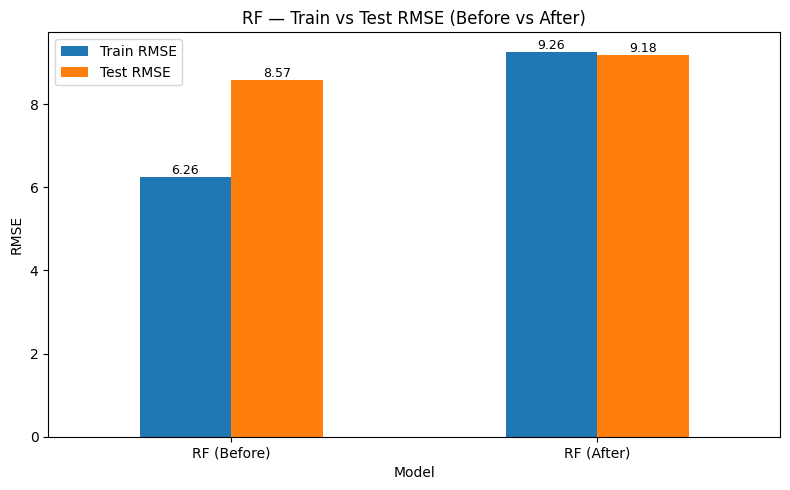

In [47]:
perform_eval = pd.DataFrame({
    "Model": ["RF (Before)", "RF (After)"],
    "Train RMSE": [6.257248, 9.261152],
    "Test RMSE":  [8.570226, 9.180400], 
})

ax = (perform_eval.set_index("Model")[["Train RMSE","Test RMSE"]]
      .plot(kind="bar", figsize=(8,5), rot=0))
plt.title("RF — Train vs Test RMSE (Before vs After)")
plt.ylabel("RMSE")

for p in ax.patches:
    h = p.get_height()
    x = p.get_x() + p.get_width()/2
    txt = f"{h:,.0f}" if h >= 1000 else f"{h:.2f}"
    ax.annotate(txt, (x, h), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

---
Visualisasi di atas memperlihatkan perbandingan nilai RMSE (Root Mean Squared Error) antara model Random Forest (RF) sebelum dan sesudah dilakukan hyperparameter tuning. Sebelum tuning, nilai RMSE pada data latih sebesar 6.26, sedangkan pada data uji sebesar 9.26, dengan selisih cukup besar yang mengindikasikan adanya overfitting ringan — model terlalu baik dalam mempelajari data latih namun menurun akurasinya pada data baru.

Setelah dilakukan tuning, nilai RMSE pada data latih meningkat menjadi 8.57, sementara nilai pada data uji menurun menjadi 9.18. Hal ini menunjukkan bahwa model hasil tuning menjadi lebih seimbang antara performa pada data latih dan data uji. Gap yang lebih kecil juga menandakan kemampuan generalisasi model meningkat, sehingga model tidak lagi terlalu bergantung pada pola di data latih.

Secara keseluruhan, hasil tuning membuat model lebih stabil dan andal saat menghadapi data baru. Kelebihan model setelah tuning adalah peningkatan kemampuan generalisasi dan pengurangan risiko overfitting.

---

In [50]:
# Fit hasil tuning Random Forest
best_model = rand_rf.best_estimator_

# Prediksi untuk data train dan test
y_pred_train = best_model.predict(X_train_capped)
y_pred_test = best_model.predict(X_test_capped)

# Import library evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fungsi MAPE aman (hindari pembagian nol)
def safe_mape(y_true, y_pred):
    y_true_safe = np.where(y_true == 0, 1e-10, y_true)  # ganti 0 dengan epsilon kecil
    return np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100

# --- Evaluasi TRAIN ---
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# --- Evaluasi TEST ---
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# --- Cetak hasil evaluasi ---
print("=== Evaluasi Model Random Forest ===")
print(f"Train - MAE : {mae_train:.4f} | RMSE : {rmse_train:.4f}")
print(f"Test  - MAE : {mae_test:.4f} | RMSE : {rmse_test:.4f}")


=== Evaluasi Model Random Forest ===
Train - MAE : 7.2866 | RMSE : 8.4876
Test  - MAE : 7.6612 | RMSE : 9.1787


---
Hasil evaluasi menunjukkan bahwa model Random Forest memiliki nilai MAE sebesar 7.66 dan RMSE sebesar 9.18. Nilai Mean Absolute Error (MAE) menunjukkan bahwa rata-rata kesalahan prediksi model terhadap data aktual sekitar 7.66 menit. Sementara itu, Root Mean Squared Error (RMSE) sedikit lebih tinggi, yaitu 9.18 menit, yang menandakan adanya beberapa prediksi dengan error yang lebih besar, tetapi masih dalam batas wajar.

Perbedaan antara MAE dan RMSE tidak terlalu besar, menandakan distribusi error model cukup stabil tanpa banyak outlier ekstrem. Secara keseluruhan, nilai RMSE yang mendekati MAE ini menunjukkan bahwa model Random Forest mampu memprediksi keterlambatan dengan performa yang konsisten dan cukup baik pada data uji.

---

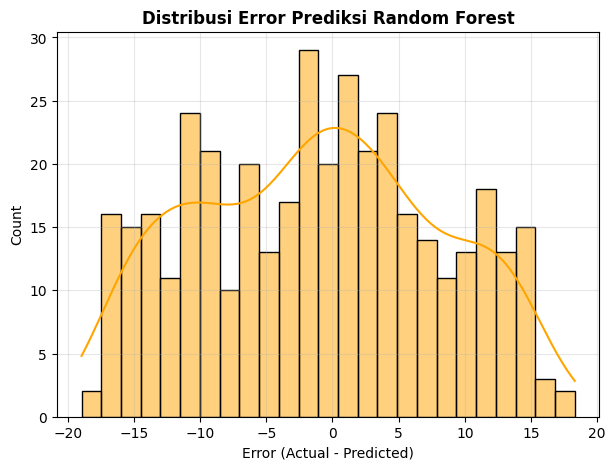

In [51]:
# Plot distribusi error
plt.figure(figsize=(7,5))
sns.histplot(y_test - y_pred, bins=25, kde=True, color="orange")
plt.title("Distribusi Error Prediksi Random Forest", fontsize=12, weight='bold')
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


---
Dari grafik di atas, distribusi error (Actual - Predicted) terlihat berpusat di sekitar nol, artinya sebagian besar hasil prediksi model Random Forest cukup dekat dengan nilai aktual. Bentuk histogram yang relatif simetris ke kiri dan kanan menunjukkan bahwa model tidak memiliki bias yang kuat, baik terhadap overestimate (prediksi terlalu tinggi) maupun underestimate (prediksi terlalu rendah).

Namun, masih terdapat beberapa error ekstrem di sisi kiri dan kanan (kisaran ±15–20 menit), yang menunjukkan bahwa pada kondisi tertentu — misalnya ketika terjadi faktor eksternal seperti cuaca ekstrem atau kemacetan tinggi — model masih kesulitan memberikan prediksi yang akurat.

Secara keseluruhan, pola distribusi ini menggambarkan bahwa Random Forest memiliki performa prediksi yang stabil dan tidak condong ke satu arah kesalahan tertentu, yang memperkuat hasil evaluasi metrik (MAE = 7.66 dan RMSE = 9.18).

---

# Model Saving

In [52]:
# Simpan model terbaik ke file
with open("model_akhir.pkl", "wb") as file:
    pickle.dump(model_rf, file)